In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing the books
books = pd.read_csv('BX_Books.csv', sep=';', encoding="latin-1")

In [27]:
#renaming the columns
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [28]:
users = pd.read_csv('BX-Users.csv',sep=';',encoding='latin-1')

In [30]:
users.columns = ['userID', 'Location', 'Age']

In [31]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1')

In [33]:
ratings.columns = ['userID', 'ISBN', 'bookRating']

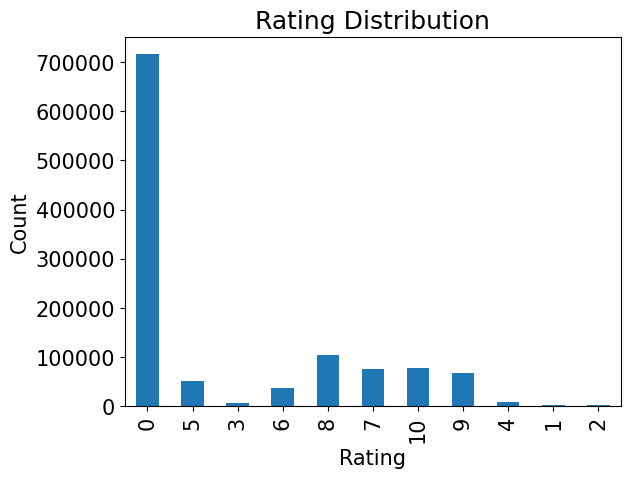

In [46]:
plt.rc("font",size = 15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Count')

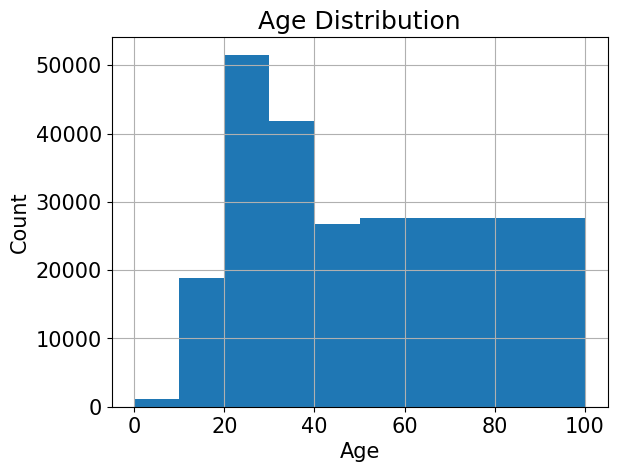

In [55]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [58]:
counts1 = ratings['userID'].value_counts()

In [63]:
ratings = ratings[ratings['userID'].isin(counts1[counts1 >=200].index)]

In [64]:
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [66]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')

In [68]:
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [69]:
combine_book_rating = combine_book_rating.drop(columns, axis=1)

In [70]:
combine_book_rating

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)
...,...,...,...,...
488751,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
488752,275970,3411086211,10,Die Biene.
488753,275970,3829021860,0,The Penis Book
488754,275970,4770019572,0,Musashi


In [71]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])
combine_book_rating

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)
...,...,...,...,...
488751,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...
488752,275970,3411086211,10,Die Biene.
488753,275970,3829021860,0,The Penis Book
488754,275970,4770019572,0,Musashi


In [86]:
book_ratingCount =( combine_book_rating.groupby(by = ['bookTitle'])['bookRating'].count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})[['bookTitle','totalRatingCount']])

In [89]:
print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [90]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1  277427  0026217457           0   
2  277427  003008685X           8   
3  277427  0030615321           0   
4  277427  0060002050           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1                 Vegetarian Times Complete Cookbook                 7  
2                                           Pioneers                 1  
3   Ask for May, Settle for June (A Doonesbury book)                 1  
4                  On a Wicked Dawn (Cynster Novels)                13  


In [91]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [92]:
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [93]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [94]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

    userID        ISBN  bookRating  \
0   277427  002542730X          10   
13  277427  0060930535           0   
15  277427  0060934417           0   
18  277427  0061009059           9   
24  277427  006440188X           0   

                                            bookTitle  totalRatingCount  
0   Politically Correct Bedtime Stories: Modern Ta...                82  
13                      The Poisonwood Bible: A Novel               133  
15                                 Bel Canto: A Novel               108  
18  One for the Money (Stephanie Plum Novels (Pape...               108  
24                                  The Secret Garden                79  


In [95]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

In [96]:
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1  277427  0060930535           0   
2  277427  0060934417           0   
3  277427  0061009059           9   
4  277427  006440188X           0   

                                           bookTitle  totalRatingCount  \
0  Politically Correct Bedtime Stories: Modern Ta...                82   
1                      The Poisonwood Bible: A Novel               133   
2                                 Bel Canto: A Novel               108   
3  One for the Money (Stephanie Plum Novels (Pape...               108   
4                                  The Secret Garden                79   

                Location  
0  gilbert, arizona, usa  
1  gilbert, arizona, usa  
2  gilbert, arizona, usa  
3  gilbert, arizona, usa  
4  gilbert, arizona, usa  


In [97]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [98]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]


316
[[ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.
   0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 

'Like Water for Chocolate : A Novel in Monthly Installments with Recipes, Romances, and Home Remedies'

In [99]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Like Water for Chocolate : A Novel in Monthly Installments with Recipes, Romances, and Home Remedies:

1: The Catcher in the Rye, with distance of 0.7772817179943308:
2: Falling Angels, with distance of 0.7909645609182925:
3: Like Water for Chocolate: A Novel in Monthly Installments, With Recipes, Romances, and Home Remedies, with distance of 0.7947655292289462:
4: Black and Blue, with distance of 0.8120025313829257:
5: The Kitchen God's Wife, with distance of 0.8121303141021331:
